<a href="https://colab.research.google.com/github/macaluzate/Tarea_Cafe/blob/main/tarea3_caf%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAF√â**

![Proceso de Caf√©](https://elsouvenir.com/wp-content/uploads/2020/06/Cafe%CC%81-y-cafe%CC%81-y-cafe%CC%81.-GIF-via-giphy.gif)

## 1. Introducci√≥n
**Objetivo:** Predecir el *puntaje de taza* de los lotes de caf√© utilizando variables conocidas antes de la cata, evitando *data leakage*.  


## Importaci√≥n de Librerias

In [1712]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

### Lectura de los dataset
En esta etapa inicial, se realiza la carga y limpieza preliminar de los dos datasets proporcionados para el proyecto:

**CC FT 17**: Registro del control de calidad del caf√© trillado.

**CC FT 18**: Registro del proceso de tosti√≥n.

Ambos datasets est√°n almacenados en archivos Excel con m√∫ltiples hojas. Por lo tanto, se decidi√≥ concatenar las hojas relevantes en un solo DataFrame para cada archivo.

In [1713]:
# Rutas exactas de los archivos
file_17 = '/content/CC FT 17   Formato de Control de Calidad CafeÃÅ de Trillado (1).xlsx'
file_18 = '/content/CC FT 18  Formato de  TostioÃÅn (1).xlsx'

# Funci√≥n para limpiar nombres de columna
def clean_columns(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # quitar columnas sin nombre
    df.columns = df.columns.str.strip().str.upper()       # espacios y may√∫sculas
    return df

# Cargar y limpiar los datos
# Normaliza todas las columnas a MAY√öSCULAS y sin espacios

df1 = pd.read_excel(file_17, sheet_name='CONTROL CALIDAD CAFE TRILLADO J', skiprows=5)
df2 = pd.read_excel(file_17, sheet_name='Sheet2', skiprows=5)
df17 = pd.concat([df1, df2], ignore_index=True)


df3 = pd.read_excel(file_18, sheet_name='TOSTI√ìN JERIC√ì L', skiprows=5)
df4 = pd.read_excel(file_18, sheet_name='TOSTI√ìN JERIC√ì', skiprows=5)
df18 = pd.concat([df3, df4], ignore_index=True)

df17 = clean_columns(df17)
df18 = clean_columns(df18)
df17.columns = df17.columns.str.strip().str.upper()
df18.columns = df18.columns.str.strip().str.upper()
df17 = df17.drop(index=[0,1])               # borra la fila vac√≠a y la de 'N¬∞'
df17 = df17.reset_index(drop=True)          # reindexa



In [1714]:
# Verifica los nombres exactos de las columnas en cada hoja
print("Columnas en df1:", df1.columns.tolist())
print("Columnas en df2:", df2.columns.tolist())

Columnas en df1: ['FECHA', 'LOTE  ', 'DENOMINACI√ìN/     MARCA', 'CANTIDAD', '%H', 'Unnamed: 5', 'MALLAS', 'Unnamed: 7', 'VERIFICACI√ìN FISICA CAF√â TOSTADO ', 'NOTAS DE CATACI√ìN', 'PUNTAJE', 'Unnamed: 11', 'LIBERACI√ìN DE LOTE', 'RESPONSABLE ']
Columnas en df2: ['FECHA', 'LOTE  ', 'DENOMINACI√ìN/     MARCA', 'CANTIDAD', '%H', 'Unnamed: 5', 'MALLAS', 'Unnamed: 7', 'VERIFICACI√ìN FISICA CAF√â TOSTADO ', 'NOTAS DE CATACI√ìN', 'PUNTAJE', 'Unnamed: 11', 'LIBERACI√ìN DE LOTE', 'RESPONSABLE ']


In [1715]:
print("Columnas en df1:", df3.columns.tolist())
print("Columnas en df2:", df4.columns.tolist())

Columnas en df1: ['Fecha ', 'Lote ', 'Origen', 'Variedad', 'Proceso', 'Beneficio ', 'Peso en Verde', 'Merma ', 'Peso en Tostado ', 'Perfil ', 'Temp. De inicio y final', 'Tiempo de tueste', 'Observaciones ', 'Tostador']
Columnas en df2: ['Fecha ', 'Lote ', 'Origen', 'Variedad', 'Proceso', 'Beneficio ', 'Peso en Verde', 'Merma ', 'Peso en Tostado ', 'Perfil ', 'Temp. De inicio y final', 'Tiempo de tueste', 'Observaciones ', 'Tostador']


In [1716]:
df18.columns.tolist()

['FECHA',
 'LOTE',
 'ORIGEN',
 'VARIEDAD',
 'PROCESO',
 'BENEFICIO',
 'PESO EN VERDE',
 'MERMA',
 'PESO EN TOSTADO',
 'PERFIL',
 'TEMP. DE INICIO Y FINAL',
 'TIEMPO DE TUESTE',
 'OBSERVACIONES',
 'TOSTADOR']

In [1717]:
df17.tail(10)

FECHA LOTE  \
129                                                NaN  NaN   
130                                                NaN  NaN   
131                                                NaN  NaN   
132                                                NaN  NaN   
133                                                NaN  NaN   
134                                                NaN  NaN   
135                                        Par√°metros:  NaN   
136                                           % H‚â§11.5  NaN   
137  Granulometria Caf√© UGQ: Tolerancia del 5% por ...  NaN   
138  Verificaci√≥n Fisica de Caf√© Tostado: M√°ximo 5 ...  NaN   

    DENOMINACI√ìN/     MARCA  CANTIDAD   %H MALLAS  \
129                     NaN       NaN  NaN    NaN   
130                     NaN       NaN  NaN    NaN   
131                     NaN       NaN  NaN    NaN   
132                     NaN       NaN  NaN    NaN   
133                     NaN       NaN  NaN    NaN   
134                     NaN       NaN  NaN    NaN   
135                     NaN       NaN  NaN    NaN   
136                     NaN       NaN  NaN    NaN   
137                     NaN       NaN  NaN    NaN   
138                     NaN       NaN  NaN    NaN   

    VERIFICACI√ìN FISICA CAF√â TOSTADO NOTAS DE CATACI√ìN PUNTAJE  \
129                              NaN               NaN     NaN   
130                              NaN               NaN     NaN   
131                              NaN               NaN     NaN   
132                              NaN               NaN     NaN   
133                              NaN               NaN     NaN   
134                              NaN               NaN     NaN   
135                              NaN               NaN     NaN   
136                              NaN               NaN     NaN   
137                              NaN               NaN     NaN   
138                              NaN               NaN     NaN   

    LIBERACI√ìN DE LOTE RESPONSABLE  
129                NaN         NaN  
130                NaN         NaN  
131                NaN         NaN  
132                NaN         NaN  
133                NaN         NaN  
134                NaN         NaN  
135                NaN         NaN  
136                NaN         NaN  
137                NaN         NaN  
138                NaN         NaN

Hay una informaci√≥n extra que no es relevante para el estudio y la estrctura de el dataset en si, por lo ue hay las removemos con esta linea de c√≥digo.

In [1718]:
df17 = df17.drop(index=range(125, 139))  # excluye filas 125-136
df17 = df17.reset_index(drop=True)  # reindexa despu√©s de eliminar

In [1719]:
df17.tail(10)

FECHA       LOTE DENOMINACI√ìN/     MARCA  CANTIDAD    %H  \
115  2023-01-03 00:00:00  08-010323     Gesha Villabernarda     50.00  10.5   
116             28-03-23  01-280323            Madre Laura      60.00  10.8   
117             29-03-23  01-290323            Madre Laura      65.00  10.5   
118  2023-10-04 00:00:00  01-100423            Madre Laura     120.00  10.8   
119             24-04-23  01-240423            Madre Laura     101.45  10.5   
120  2023-05-04 00:00:00  01-040523            Madre Laura      40.00  10.8   
121  2023-06-15 00:00:00  01-150623            Madre Laura      10.00  10.5   
122  2023-10-27 00:00:00  01-271023            Madre Laura      20.00  10.5   
123          10-Ene-2024  01-100124            Madre Laura      20.00  10.4   
124        02-Abril-2024  01-020424            Madre Laura      20.00  10.5   

    MALLAS VERIFICACI√ìN FISICA CAF√â TOSTADO  \
115     14                                C   
116     14                                C   
117     14                                C   
118     14                                C   
119     14                                C   
120     14                                C   
121     14                                C   
122     14                                C   
123     14                                c   
124     14                                C   

                                     NOTAS DE CATACI√ìN PUNTAJE  \
115  Jazmin, mandarina, acidez jugosa, cuerpo sedos...      86   
116  Chocolate negro, toque frutal, cuerpo medio, a...      84   
117  Chocolate negro, toque frutal, cuerpo medio, a...      84   
118  Chocolate negro, toque frutal, cuerpo medio, a...      84   
119  Chocolate negro, toque frutal, cuerpo medio, a...      84   
120  Chocolate negro, toque frutal, cuerpo medio, a...      84   
121  Chocolate negro, toque frutal, cuerpo medio, a...      84   
122  Chocolate negro, toque frutal, cuerpo medio, a...      84   
123  Chocolate negro, toque frutal, cuerpo medio, a...      84   
124  Chocolate negro, toque frutal, cuerpo medio, a...      84   

    LIBERACI√ìN DE LOTE RESPONSABLE  
115                 SI          AC  
116                 SI          AC  
117                 SI          AC  
118                 SI          AC  
119                 SI          AC  
120                 SI          AC  
121                 SI          AC  
122                 SI          AC  
123                 SI          AC  
124                 SI          AC

In [1720]:
df17['MALLAS'].isnull().sum()

np.int64(18)

In [1721]:
df17['CANTIDAD'].isnull().sum()

np.int64(19)

In [1722]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             110 non-null    object 
 1   LOTE                              106 non-null    object 
 2   DENOMINACI√ìN/     MARCA           106 non-null    object 
 3   CANTIDAD                          106 non-null    float64
 4   %H                                107 non-null    object 
 5   MALLAS                            107 non-null    object 
 6   VERIFICACI√ìN FISICA CAF√â TOSTADO  107 non-null    object 
 7   NOTAS DE CATACI√ìN                 105 non-null    object 
 8   PUNTAJE                           105 non-null    object 
 9   LIBERACI√ìN DE LOTE                106 non-null    object 
 10  RESPONSABLE                       105 non-null    object 
dtypes: float64(1), object(10)
memory usage: 10.9+ KB


Observando la informaci√≥n de arriba y examinando el dataset 17 se puede apreciar que hay columnas que deberian ser de tipo n√∫merico denotadas como object. Comienzo entonces haciendo la conversi√≥n utilizando pandas por medio de pd.to_numeric

In [1723]:
df17['MALLAS'] = pd.to_numeric(df17['MALLAS'], errors='coerce')

# Convertir '%H' a num√©rico
df17['%H'] = pd.to_numeric(df17['%H'].astype(str).str.replace(',', '.'), errors='coerce')

df17['PUNTAJE'] = pd.to_numeric(df17['PUNTAJE'], errors='coerce')
df17 = df17.dropna(subset=['PUNTAJE']).reset_index(drop=True)

In [1724]:
print(df17[['%H', 'MALLAS']].info())
print(df17[['%H', 'MALLAS']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   %H      103 non-null    float64
 1   MALLAS  103 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
     %H  MALLAS
0  10.9    14.0
1  10.2    14.0
2  10.7    14.0
3  10.5    14.0
4  10.7    14.0


  *DTYPE* a float64.

In [1725]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FECHA                    529 non-null    object 
 1   LOTE                     529 non-null    object 
 2   ORIGEN                   529 non-null    object 
 3   VARIEDAD                 529 non-null    object 
 4   PROCESO                  529 non-null    object 
 5   BENEFICIO                529 non-null    object 
 6   PESO EN VERDE            529 non-null    float64
 7   MERMA                    529 non-null    float64
 8   PESO EN TOSTADO          529 non-null    float64
 9   PERFIL                   529 non-null    object 
 10  TEMP. DE INICIO Y FINAL  529 non-null    object 
 11  TIEMPO DE TUESTE         529 non-null    object 
 12  OBSERVACIONES            19 non-null     object 
 13  TOSTADOR                 529 non-null    object 
dtypes: float64(3), object(11)


In [1726]:
df18.head(80)

FECHA       LOTE           ORIGEN  VARIEDAD      PROCESO  \
0              22-07-22  01-190722           Jerico  Dos mil   Tradicional   
1              25-07-22  01-190722           Jerico  Dos mil   Tradicional   
2              25-07-22  01-190722           Jerico  Dos mil   Tradicional   
3              28-07-22  01-190722           Jerico  Dos mil   Tradicional   
4              28-07-22  09-190722  Ciudad Bolivar      Tabi      Natural    
..                  ...        ...              ...       ...          ...   
75  2023-06-01 00:00:00  08-241122           Jerico    Gesha        Honey    
76  2023-06-01 00:00:00  02-241122           Jerico  Dos mil      Natural    
77  2023-06-01 00:00:00  05-241122           Jerico  Dos mil   Tradicional   
78  2023-06-01 00:00:00  01-291022           Jerico  Dos mil   Tradicional   
79  2023-06-01 00:00:00  01-291022           Jerico  Dos mil   Tradicional   

   BENEFICIO  PESO EN VERDE      MERMA  PESO EN TOSTADO     PERFIL  \
0    Lavado            9.00  15.000000             7.65  Filtrado    
1    Lavado            3.00  16.666667             2.50  Espressso   
2    Lavado            9.00  16.444444             7.52  Filtrado    
3    Lavado           11.70  16.324786             9.79  Filtrado    
4   Natural            0.45  24.444444             0.34  Filtrado    
..       ...            ...        ...              ...        ...   
75    Honey            2.80  15.000000             2.38  Filtrado    
76  Natural            6.20  18.064516             5.08  Filtrado    
77   Lavado            5.00  11.600000             4.42  Filtrado    
78   Lavado           15.50  16.645161            12.92  Filtrado    
79   Lavado            6.20  19.354839             5.00  Espressso   

   TEMP. DE INICIO Y FINAL TIEMPO DE TUESTE OBSERVACIONES TOSTADOR  
0                175¬∞/191¬∞         08:01:00           NaN      LFQ  
1                175¬∞/195¬∞         08:42:00           NaN      LFQ  
2                175¬∞/190¬∞         07:58:00           NaN      LFQ  
3                175¬∞/191¬∞         08:02:00           NaN      LFQ  
4                150¬∞/186¬∞         08:10:00           NaN      LFQ  
..                     ...              ...           ...      ...  
75               170¬∞/189¬∞         08:02:00           NaN      LFQ  
76               170¬∞/191¬∞         08:10:00           NaN      LFQ  
77               170¬∞/192¬∞         08:05:00           NaN      LFQ  
78               170¬∞/191¬∞         08:04:00           NaN      LFQ  
79               175¬∞/195¬∞         08:16:00           NaN      LFQ  

[80 rows x 14 columns]

In [1727]:
df17.duplicated().sum()

np.int64(0)

In [1728]:
df18.duplicated().sum()

np.int64(1)

In [1729]:
# Mostrar todas las filas que est√°n duplicadas en df18 (keep=False marca TODAS las copias)
duplicated_rows = df18[df18.duplicated(keep=False)]
print("Filas duplicadas en df18:\n", duplicated_rows)


Filas duplicadas en df18:
                    FECHA       LOTE    ORIGEN    VARIEDAD   PROCESO BENEFICIO  \
127  2023-01-03 00:00:00  11-010223  Herrera   Wush Wush   Natural   Natural    
130  2023-01-03 00:00:00  11-010223  Herrera   Wush Wush   Natural   Natural    

     PESO EN VERDE      MERMA  PESO EN TOSTADO    PERFIL  \
127            1.2  16.666667              1.0  Filtrado   
130            1.2  16.666667              1.0  Filtrado   

    TEMP. DE INICIO Y FINAL TIEMPO DE TUESTE OBSERVACIONES TOSTADOR  
127               175¬∞/190¬∞         06:52:00           NaN     LFQ   
130               175¬∞/190¬∞         06:52:00           NaN     LFQ   


### **Peque√±a apreciaci√≥n**

revisando el dataset 18 se ve un duplicado completo

Error de captura: alguien pudo haber pegado o subido dos veces la misma l√≠nea.

M√∫ltiples mediciones con mismos par√°metros: tal vez se tost√≥ dos bolsas diferentes del mismo lote bajo condiciones id√©nticas y se registraron por separado.



In [1730]:
df18.head()

FECHA       LOTE           ORIGEN  VARIEDAD      PROCESO BENEFICIO  \
0  22-07-22  01-190722           Jerico  Dos mil   Tradicional   Lavado    
1  25-07-22  01-190722           Jerico  Dos mil   Tradicional   Lavado    
2  25-07-22  01-190722           Jerico  Dos mil   Tradicional   Lavado    
3  28-07-22  01-190722           Jerico  Dos mil   Tradicional   Lavado    
4  28-07-22  09-190722  Ciudad Bolivar      Tabi      Natural   Natural    

   PESO EN VERDE      MERMA  PESO EN TOSTADO     PERFIL  \
0           9.00  15.000000             7.65  Filtrado    
1           3.00  16.666667             2.50  Espressso   
2           9.00  16.444444             7.52  Filtrado    
3          11.70  16.324786             9.79  Filtrado    
4           0.45  24.444444             0.34  Filtrado    

  TEMP. DE INICIO Y FINAL TIEMPO DE TUESTE OBSERVACIONES TOSTADOR  
0               175¬∞/191¬∞         08:01:00           NaN      LFQ  
1               175¬∞/195¬∞         08:42:00           NaN      LFQ  
2               175¬∞/190¬∞         07:58:00           NaN      LFQ  
3               175¬∞/191¬∞         08:02:00           NaN      LFQ  
4               150¬∞/186¬∞         08:10:00           NaN      LFQ

In [1731]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             103 non-null    object 
 1   LOTE                              103 non-null    object 
 2   DENOMINACI√ìN/     MARCA           103 non-null    object 
 3   CANTIDAD                          103 non-null    float64
 4   %H                                103 non-null    float64
 5   MALLAS                            103 non-null    float64
 6   VERIFICACI√ìN FISICA CAF√â TOSTADO  103 non-null    object 
 7   NOTAS DE CATACI√ìN                 103 non-null    object 
 8   PUNTAJE                           103 non-null    float64
 9   LIBERACI√ìN DE LOTE                103 non-null    object 
 10  RESPONSABLE                       103 non-null    object 
dtypes: float64(4), object(7)
memory usage: 9.0+ KB


In [1732]:
print(df17.isnull().sum())

FECHA                               0
LOTE                                0
DENOMINACI√ìN/     MARCA             0
CANTIDAD                            0
%H                                  0
MALLAS                              0
VERIFICACI√ìN FISICA CAF√â TOSTADO    0
NOTAS DE CATACI√ìN                   0
PUNTAJE                             0
LIBERACI√ìN DE LOTE                  0
RESPONSABLE                         0
dtype: int64


##Limpieza y An√°lisis Exploratorio

Comienzo viendo si hay datos mixtos en las columnas, ya que para hacer OneHot se necesita la √∫nicidad.

In [1733]:
for col in df17.columns:
    tipos = set(df17[col].dropna().map(type))
    if len(tipos) > 1:
        print(f"‚ö† {col}: mezcla de tipos ‚Üí {tipos}")
    else:
        print(f"{col}: √∫nico tipo ‚Üí {tipos}")


‚ö† FECHA: mezcla de tipos ‚Üí {<class 'datetime.datetime'>, <class 'str'>}
LOTE: √∫nico tipo ‚Üí {<class 'str'>}
DENOMINACI√ìN/     MARCA: √∫nico tipo ‚Üí {<class 'str'>}
CANTIDAD: √∫nico tipo ‚Üí {<class 'float'>}
%H: √∫nico tipo ‚Üí {<class 'float'>}
MALLAS: √∫nico tipo ‚Üí {<class 'float'>}
VERIFICACI√ìN FISICA CAF√â TOSTADO: √∫nico tipo ‚Üí {<class 'str'>}
NOTAS DE CATACI√ìN: √∫nico tipo ‚Üí {<class 'str'>}
PUNTAJE: √∫nico tipo ‚Üí {<class 'float'>}
LIBERACI√ìN DE LOTE: √∫nico tipo ‚Üí {<class 'str'>}
RESPONSABLE: √∫nico tipo ‚Üí {<class 'str'>}


In [1734]:
for col in df18.columns:
    tipos = set(df18[col].dropna().map(type).unique())
    if len(tipos) > 1:
        print(f"‚ö† {col}: tipos detectados ‚Üí {tipos}")


‚ö† FECHA: tipos detectados ‚Üí {<class 'datetime.datetime'>, <class 'str'>}
‚ö† TIEMPO DE TUESTE: tipos detectados ‚Üí {<class 'datetime.time'>, <class 'str'>}


Por los resultados obtenidos noto que el dataset 17 solo tiene la columna FECHA con tipos mezclados.

Para el caso del dataset 18, Tomo la decisi√≥n de crear una nueva columna transformando los datos de la columna ***TIEMPO DE TUESTE*** a minutos, pues tengo la idea que esta variable ser√° importante para predecir el puntaje del caf√©.

In [1735]:
# Nombre exacto de la columna original
col = 'TIEMPO DE TUESTE'

# 1) Homogeneizar a string y parsear como timedelta
df18['TIEMPO_DELTA'] = pd.to_timedelta(df18[col].astype(str), errors='coerce')

# 2) Extraer minutos
df18['TIEMPO DE TUESTE EN MIN'] = df18['TIEMPO_DELTA'].dt.total_seconds() / 60

# 3) Eliminar columnas intermedias y la original
df18 = df18.drop(columns=[col, 'TIEMPO_DELTA'])

print(df18[['TIEMPO DE TUESTE EN MIN']].head())



   TIEMPO DE TUESTE EN MIN
0                    481.0
1                    522.0
2                    478.0
3                    482.0
4                    490.0


In [1736]:
#Viendo valores √∫nicos de Origen
n_unique = df18['ORIGEN'].nunique()
print("Valores √∫nicos en ORIGEN:", n_unique)
print(df18['ORIGEN'].value_counts())

Valores √∫nicos en ORIGEN: 14
ORIGEN
Jerico             334
Jerico              32
Ciudad Bolivar      21
Herrra              18
Aipe                17
Herrera             17
Chaparral           17
Planadas            16
Salento             14
Acevedo             12
Quimbaya            10
Rovira               9
Rioblanco            8
San Antonio          4
Name: count, dtype: int64


Revisando el Excel, veo que hay varias filas con datos mal escritos, tendr√© que corregir y unificar.

**Lo har√© despues de hacer el merge de los 2 dataset(17 y 18)**

In [1737]:
df18.head()

FECHA       LOTE           ORIGEN  VARIEDAD      PROCESO BENEFICIO  \
0  22-07-22  01-190722           Jerico  Dos mil   Tradicional   Lavado    
1  25-07-22  01-190722           Jerico  Dos mil   Tradicional   Lavado    
2  25-07-22  01-190722           Jerico  Dos mil   Tradicional   Lavado    
3  28-07-22  01-190722           Jerico  Dos mil   Tradicional   Lavado    
4  28-07-22  09-190722  Ciudad Bolivar      Tabi      Natural   Natural    

   PESO EN VERDE      MERMA  PESO EN TOSTADO     PERFIL  \
0           9.00  15.000000             7.65  Filtrado    
1           3.00  16.666667             2.50  Espressso   
2           9.00  16.444444             7.52  Filtrado    
3          11.70  16.324786             9.79  Filtrado    
4           0.45  24.444444             0.34  Filtrado    

  TEMP. DE INICIO Y FINAL OBSERVACIONES TOSTADOR  TIEMPO DE TUESTE EN MIN  
0               175¬∞/191¬∞           NaN      LFQ                    481.0  
1               175¬∞/195¬∞           NaN      LFQ                    522.0  
2               175¬∞/190¬∞           NaN      LFQ                    478.0  
3               175¬∞/191¬∞           NaN      LFQ                    482.0  
4               150¬∞/186¬∞           NaN      LFQ                    490.0

In [1738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             103 non-null    object 
 1   LOTE                              103 non-null    object 
 2   DENOMINACI√ìN/     MARCA           103 non-null    object 
 3   CANTIDAD                          103 non-null    float64
 4   %H                                103 non-null    float64
 5   MALLAS                            103 non-null    float64
 6   VERIFICACI√ìN FISICA CAF√â TOSTADO  103 non-null    object 
 7   NOTAS DE CATACI√ìN                 103 non-null    object 
 8   PUNTAJE                           103 non-null    float64
 9   LIBERACI√ìN DE LOTE                103 non-null    object 
 10  RESPONSABLE                       103 non-null    object 
 11  VARIEDAD_ESTANDAR                 103 non-null    object 
 12  PRO

In [1739]:
df.head(200)

FECHA         LOTE DENOMINACI√ìN/     MARCA  CANTIDAD    %H  \
0               19-07-22    01-190722             Madre Laura    765.00  10.9   
1                19-7-22    09-190722            Tabi Natural    204.00  10.2   
2               19-07-22    10-190722               Don Mario    165.00  10.7   
3               27-07-22  07-19-07-22               Don Felix      0.45  10.5   
4               31-10-22    01-291022             Madre Laura    105.00  10.7   
..                   ...          ...                     ...       ...   ...   
98   2023-05-04 00:00:00    01-040523             Madre Laura     40.00  10.8   
99   2023-06-15 00:00:00    01-150623             Madre Laura     10.00  10.5   
100  2023-10-27 00:00:00    01-271023             Madre Laura     20.00  10.5   
101          10-Ene-2024    01-100124             Madre Laura     20.00  10.4   
102        02-Abril-2024    01-020424             Madre Laura     20.00  10.5   

     MALLAS VERIFICACI√ìN FISICA CAF√â TOSTADO  \
0      14.0                                C   
1      14.0                                C   
2      14.0                                C   
3      14.0                                C   
4      14.0                                C   
..      ...                              ...   
98     14.0                                C   
99     14.0                                C   
100    14.0                                C   
101    14.0                                C   
102    14.0                                C   

                                     NOTAS DE CATACI√ìN  PUNTAJE  \
0    Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
1    Frutas maduras, nibs de cacao, acidez brillant...     85.0   
2    Panela, durazno, miel, acidez brillante citric...     84.5   
3    Moras maduras, chocolate negro, acidez media c...     84.5   
4    Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
..                                                 ...      ...   
98   Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
99   Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
100  Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
101  Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
102  Chocolate negro, toque frutal, cuerpo medio, a...     84.0   

    LIBERACI√ìN DE LOTE RESPONSABLE VARIEDAD_ESTANDAR      PROCESO  ORIGEN  \
0                   SI         LFQ             Otros          NAN     NAN   
1                   SI         LFQ             Otros          NAN     NAN   
2                   SI         LFQ           Dos mil  TRADICIONAL  JERICO   
3                   SI         LFQ           Dos mil  TRADICIONAL  JERICO   
4                   SI         LFQ             Otros          NAN     NAN   
..                 ...         ...               ...          ...     ...   
98                  SI          AC             Otros          NAN     NAN   
99                  SI          AC             Otros          NAN     NAN   
100                 SI          AC             Otros          NAN     NAN   
101                 SI          AC             Otros          NAN     NAN   
102                 SI          AC             Otros          NAN     NAN   

     TIEMPO_DE_TUESTE_MIN  TIEMPO_TUESTE_MEDIAN BENEFICIO  
0                     NaN                 492.0       NAN  
1                     NaN                 492.0       NAN  
2                   495.0                 495.0    LAVADO  
3                   495.0                 495.0    LAVADO  
4                     NaN                 492.0       NAN  
..                    ...                   ...       ...  
98                    NaN                 492.0       NAN  
99                    NaN                 492.0       NAN  
100                   NaN                 492.0       NAN  
101                   NaN                 492.0       NAN  
102                   NaN                 492.0       NAN  

[103 rows x 1

## Matrices de Correlaci√≥n y gr√°ficos de los dataset

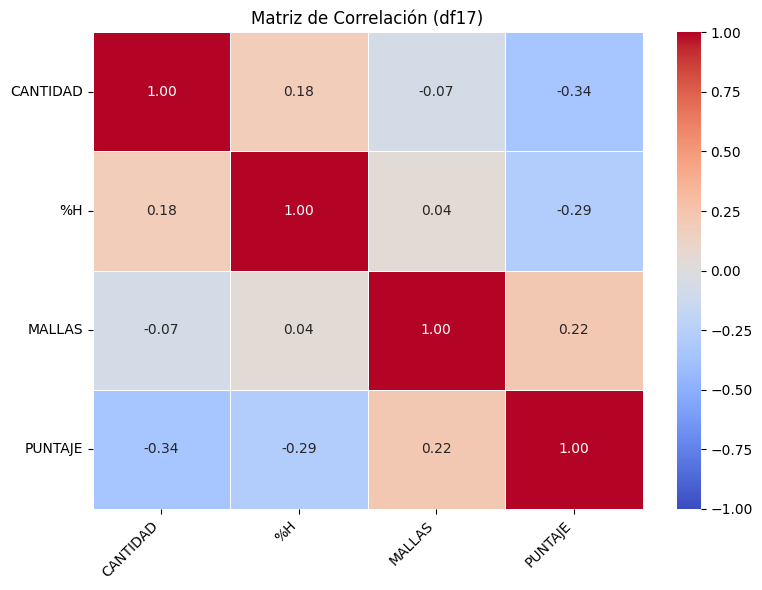

In [1740]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Selecciona las columnas num√©ricas de df17 (excepto PUNTAJE si est√° incluida)
numeric_cols_17 = df17.select_dtypes(include=['int64','float64']).columns.tolist()
if 'PUNTAJE' in numeric_cols_17:
    numeric_cols_17.remove('PUNTAJE')

# 2) Define el listado completo incluyendo PUNTAJE
cols17 = numeric_cols_17 + ['PUNTAJE']

# 3) Calcula la matriz de correlaci√≥n
corr17 = df17[cols17].corr()

# 4) Grafica el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr17,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title('Matriz de Correlaci√≥n (df17)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### VERIFICACI√ìN DE OUTLIERS EN LOS DATOS

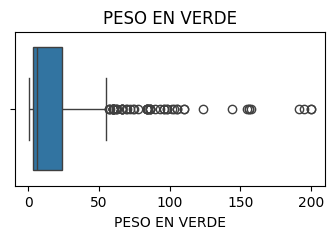

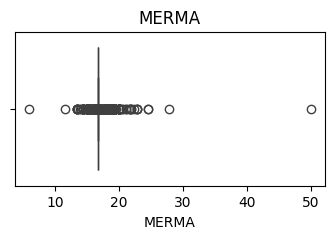

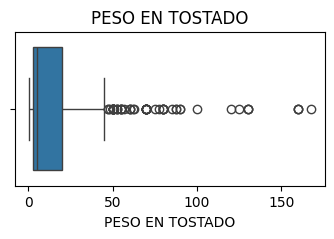

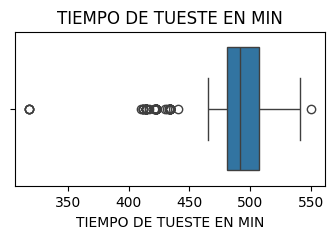

In [1741]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df18.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df18[col])
    plt.title(col)
    plt.show()


Los puntos aislados a la derecha indican valores extremadamente altos, lejos de la mayor√≠a de los datos. Esto sugiere registros potencialmente err√≥neos o eventos excepcionales en la medici√≥n del peso del caf√© tostado.

Distribuci√≥n sesgada hacia la derecha:

La caja est√° situada hacia la izquierda, lo que indica que la mayor√≠a de los valores se concentra en valores m√°s bajos (por debajo de 50 aproximadamente). La cola hacia la derecha es larga, indicando que hay muestras puntuales con pesos considerablemente mayores que la media.

Mediana y rango intercuartil (IQR):

La l√≠nea central (mediana) est√° cerca del extremo inferior del rango total de los datos, reforzando el sesgo hacia pesos bajos.

El rango intercuart√≠lico (la caja azul) es relativamente estrecho, lo cual indica que la mayor√≠a de los datos est√°n bastante concentrados alrededor de la mediana.

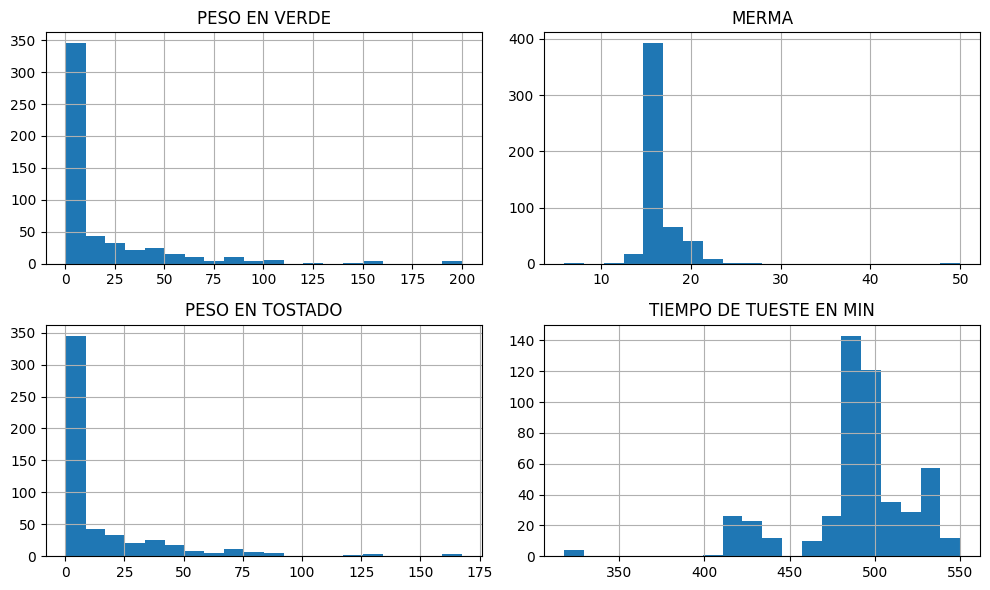

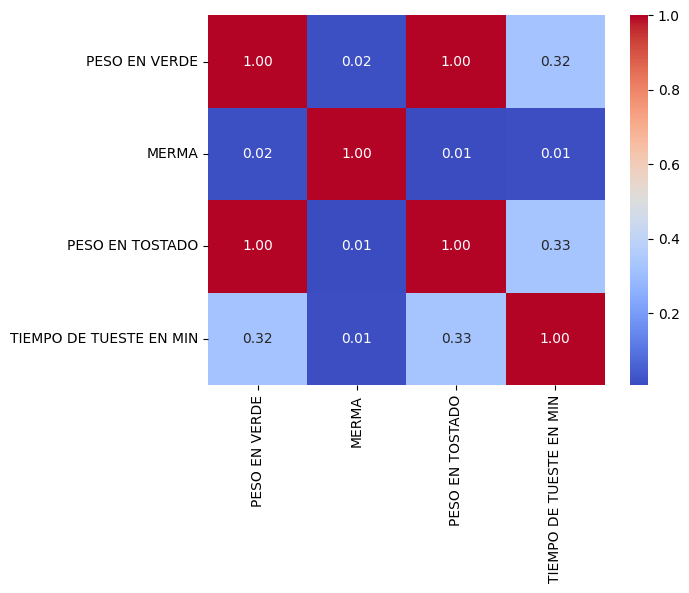

In [1742]:
# Histograma de cada num√©rica
df18[num_cols].hist(bins=20, figsize=(10,6))
plt.tight_layout()
plt.show()

# Matriz de correlaci√≥n
corr = df18[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


## Unificaci√≥n del *dataset*

Estoy en un proceso de unificaci√≥n y limpieza del dataset. Entonces lo que quiero escribir es lo siguiente. Estoy en un proceso de unificaci√≥n y limpieza del dataset. Entonces lo que quiero escribir es lo siguiente. Viendo las columnas de los dos datasets, vemos que hay una que se comparte, que es la columna lote. Pero como los datasets 17 y 18 tienen un n√∫mero de columnas dispares, entonces no es viable directamente hacer el merge. La decisi√≥n que tom√© es la siguiente:

Observando los datasets, me doy cuenta que la columna de **denominaci√≥n/ marca** del dataset 17 puede ser interesante porque eso va a desprender en... en qu√© columnas del dataset 18 tienen relaci√≥n con √©sta. Por ejemplo, la columna variedad dice, Dos Mil, Tabi, dice Colombia, dice Geisha, y esos son nombres que est√°n en la denominaci√≥n o en la marca. Por lo tanto, a partir de ah√≠ voy a hacer mi an√°lisis para poder entonces unificar esos dos datasets.



In [1743]:
df['RESPONSABLE'].value_counts()

RESPONSABLE
LFQ    75
AC     28
Name: count, dtype: int64

In [1744]:
df['RESPONSABLE'] = df['RESPONSABLE'].str.strip()
df['RESPONSABLE'].value_counts()

RESPONSABLE
LFQ    75
AC     28
Name: count, dtype: int64

Lo siguiente es identificar un mapeo de variedades entre la columna **VARIEDAD** y la columna **DENOMINACI√ìN / MARCA**, para crear un nuevo dataset llamado **DF**. Con **DF** se realizar√° entonces el procesamiento y el entrenamiento.


In [1745]:
# Primero definimos el diccionario base
mapeo_variedades = {
    # Mapeos espec√≠ficos
    'Tabi Natural': 'Tabi',
    'Don Mario': 'Dos mil',
    'Monteverde - Wush Wush': 'Wush Wush',
    'Don Felix': 'Dos mil',
    'Do√±a Dolly': 'Dos mil',
    'Madre Laura Natural': 'Dos mil',
    'Madre Laura': 'Dos mil',

    # Todo lo Gesha
    'Gesha Villabernarda': 'Gesha',
    'Gesha Villa - Natural': 'Gesha',
    'Gesha Blue - Monteverde': 'Gesha',

    # Todo lo Don -> Dos mil
    **{nombre: 'Dos mil' for nombre in df17['DENOMINACI√ìN/     MARCA'].unique()
       if isinstance(nombre, str) and nombre.startswith('Don')},

    # Bourbon a Bourbon Rojo
    **{nombre: 'Bourbon Rojo' for nombre in df17['DENOMINACI√ìN/     MARCA'].unique()
       if isinstance(nombre, str) and 'Bourbon' in nombre},

    # Caso especial
    'El Ocaso - Caturron': 'Caturra'
}

# Luego a√±adimos el caso "Otros" por separado
otros_mapes = {
    nombre: 'Otros' for nombre in df17['DENOMINACI√ìN/     MARCA'].unique()
    if isinstance(nombre, str) and nombre not in mapeo_variedades
}

# Combinamos ambos diccionarios
mapeo_variedades.update(otros_mapes)

Esa **VARIEDAD** en el nuevo dataset ser√° denotada como **variedad_bajo_estandar**. Posteriormente unificar√© (normalizar√©) las columnas de **proceso**.


In [1746]:
df17['VARIEDAD_ESTANDAR'] = df17['DENOMINACI√ìN/     MARCA'].map(mapeo_variedades)

In [1747]:
# Verifica que la columna existe exactamente as√≠
print(df17.columns.tolist())

# Muestra los mapeos resultantes
print(mapeo_variedades)

['FECHA', 'LOTE', 'DENOMINACI√ìN/     MARCA', 'CANTIDAD', '%H', 'MALLAS', 'VERIFICACI√ìN FISICA CAF√â TOSTADO', 'NOTAS DE CATACI√ìN', 'PUNTAJE', 'LIBERACI√ìN DE LOTE', 'RESPONSABLE', 'VARIEDAD_ESTANDAR']
{'Tabi Natural': 'Tabi', 'Don Mario': 'Dos mil', 'Monteverde - Wush Wush': 'Wush Wush', 'Don Felix': 'Dos mil', 'Do√±a Dolly': 'Dos mil', 'Madre Laura Natural': 'Dos mil', 'Madre Laura': 'Dos mil', 'Gesha Villabernarda': 'Gesha', 'Gesha Villa - Natural': 'Gesha', 'Gesha Blue - Monteverde': 'Gesha', 'Don Mario ': 'Dos mil', 'Don Felix ': 'Dos mil', 'Don Victor - Marago ': 'Dos mil', 'Don Rafael ': 'Dos mil', 'Don Johan': 'Dos mil', 'Don Victor - Red Bourbon': 'Bourbon Rojo', 'Don Victor ': 'Dos mil', 'El Ocaso - Pink Bourbon': 'Bourbon Rojo', 'El Cedrela - Pink Bourbon': 'Bourbon Rojo', 'Bourbon Sidra - Las Flores ': 'Bourbon Rojo', 'El Ocaso - Caturron': 'Caturra', 'Madre Laura ': 'Otros', 'Tabi Natural ': 'Otros', 'Madre Laura Descafeinado': 'Otros', 'Do√±a Rosalba ': 'Otros', 'Do√±a 

In [1748]:
# 1. Crear una COPIA de df17 para no modificarlo
df = df17.copy()

# 2. Aplicar el mapeo al nuevo DataFrame 'df'
df['VARIEDAD_ESTANDAR'] = df['DENOMINACI√ìN/     MARCA'].map(mapeo_variedades)

# 3. Manejar valores no mapeados (opcional)
df['VARIEDAD_ESTANDAR'] = df['VARIEDAD_ESTANDAR'].fillna('Otros')  # O cualquier valor por defecto

In [1749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             103 non-null    object 
 1   LOTE                              103 non-null    object 
 2   DENOMINACI√ìN/     MARCA           103 non-null    object 
 3   CANTIDAD                          103 non-null    float64
 4   %H                                103 non-null    float64
 5   MALLAS                            103 non-null    float64
 6   VERIFICACI√ìN FISICA CAF√â TOSTADO  103 non-null    object 
 7   NOTAS DE CATACI√ìN                 103 non-null    object 
 8   PUNTAJE                           103 non-null    float64
 9   LIBERACI√ìN DE LOTE                103 non-null    object 
 10  RESPONSABLE                       103 non-null    object 
 11  VARIEDAD_ESTANDAR                 103 non-null    object 
dtypes: 

In [1750]:
df['VARIEDAD_ESTANDAR'].unique()


array(['Otros', 'Dos mil', 'Gesha', 'Wush Wush', 'Bourbon Rojo'],
      dtype=object)

In [1751]:
otros_df = df[df['VARIEDAD_ESTANDAR'] == 'Otros']
print(otros_df)

                   FECHA        LOTE   DENOMINACI√ìN/     MARCA  CANTIDAD  \
0               19-07-22   01-190722              Madre Laura     765.00   
1                19-7-22   09-190722             Tabi Natural     204.00   
4               31-10-22   01-291022              Madre Laura     105.00   
5    2022-02-11 00:00:00   01-291022              Madre Laura     105.00   
6    2022-11-11 00:00:00   01-101122              Madre Laura     210.00   
10              30-12-22   01-291222              Madre Laura      70.00   
11              17-01-23   01-130123              Madre Laura     585.00   
12   2023-08-02 00:00:00   03-010223  Madre Laura Descafeinado    210.00   
13   2023-08-02 00:00:00   01-010223              Madre Laura     140.00   
21   2023-07-03 00:00:00   01-070323              Madre Laura     716.00   
22               14-4-23   09-120423             Tabi Natural      70.00   
24               20-4-23   01-200423              Madre Laura     691.00   
25         

In [1752]:
# Eliminar espacios en la columna 'DENOMINACI√ìN/MARCA'
df['DENOMINACI√ìN/     MARCA'] = df17['DENOMINACI√ìN/     MARCA'].str.strip()

# Verificar resultados
print(df['DENOMINACI√ìN/     MARCA'].unique())

['Madre Laura' 'Tabi Natural' 'Don Mario' 'Don Felix'
 'Gesha Villabernarda' 'Madre Laura Natural' 'Do√±a Dolly'
 'Madre Laura Descafeinado' 'Monteverde - Wush Wush'
 'El Ocaso - Pink Bourbon' 'El Cedrela - Pink Bourbon'
 'Don Victor - Marago' 'Don Rafael' 'Do√±a Rosalba' 'Do√±a Liceth'
 'Madre Laura Lavado' 'Familia Bedoya Casta√±o' 'Don Johan'
 'Gesha Blue - Monteverde' 'Bourbon Sidra - Las Flores'
 'Don Victor - Red Bourbon' 'El Ocaso - Caturron' 'Esteban Robledo'
 'Don Victor']


In [1753]:
df18['VARIEDAD'] = df18['VARIEDAD'].str.strip()

In [1754]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FECHA                    529 non-null    object 
 1   LOTE                     529 non-null    object 
 2   ORIGEN                   529 non-null    object 
 3   VARIEDAD                 529 non-null    object 
 4   PROCESO                  529 non-null    object 
 5   BENEFICIO                529 non-null    object 
 6   PESO EN VERDE            529 non-null    float64
 7   MERMA                    529 non-null    float64
 8   PESO EN TOSTADO          529 non-null    float64
 9   PERFIL                   529 non-null    object 
 10  TEMP. DE INICIO Y FINAL  529 non-null    object 
 11  OBSERVACIONES            19 non-null     object 
 12  TOSTADOR                 529 non-null    object 
 13  TIEMPO DE TUESTE EN MIN  499 non-null    float64
dtypes: float64(4), object(10)


In [1755]:
df18['VARIEDAD'].value_counts()

VARIEDAD
Dos mil          284
Gesha             57
Colombia          32
Pink Bourbon      30
Wush Wush         27
Tabi              21
Maragogipe        17
Red Bourbon       15
Caturra           13
Bourbon Sidra     12
Castillo           9
Bourbon Rojo       6
Caturron           6
Name: count, dtype: int64

In [1756]:
df18['VARIEDAD'].unique()

array(['Dos mil', 'Tabi', 'Caturra', 'Gesha', 'Colombia', 'Wush Wush',
       'Pink Bourbon', 'Maragogipe', 'Castillo', 'Bourbon Rojo',
       'Bourbon Sidra', 'Red Bourbon', 'Caturron'], dtype=object)

In [1757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             103 non-null    object 
 1   LOTE                              103 non-null    object 
 2   DENOMINACI√ìN/     MARCA           103 non-null    object 
 3   CANTIDAD                          103 non-null    float64
 4   %H                                103 non-null    float64
 5   MALLAS                            103 non-null    float64
 6   VERIFICACI√ìN FISICA CAF√â TOSTADO  103 non-null    object 
 7   NOTAS DE CATACI√ìN                 103 non-null    object 
 8   PUNTAJE                           103 non-null    float64
 9   LIBERACI√ìN DE LOTE                103 non-null    object 
 10  RESPONSABLE                       103 non-null    object 
 11  VARIEDAD_ESTANDAR                 103 non-null    object 
dtypes: 

In [1758]:
df18['PROCESO'].unique()

array(['Tradicional', 'Natural ', 'Honey ', 'Tradicional ', 'Lavado '],
      dtype=object)

In [1759]:
# Extraer pares √∫nicos de VARIEDAD y PROCESO de df18
proceso_por_variedad = (
    df18.drop_duplicates('VARIEDAD')[['VARIEDAD', 'PROCESO']]
    .set_index('VARIEDAD')['PROCESO']
    .to_dict()
)

# Verificar el diccionario
print("Relaci√≥n VARIEDAD ‚Üí PROCESO:", proceso_por_variedad)

Relaci√≥n VARIEDAD ‚Üí PROCESO: {'Dos mil': 'Tradicional', 'Tabi': 'Natural ', 'Caturra': 'Tradicional', 'Gesha': 'Honey ', 'Colombia': 'Tradicional ', 'Wush Wush': 'Natural ', 'Pink Bourbon': 'Honey ', 'Maragogipe': 'Lavado ', 'Castillo': 'Tradicional', 'Bourbon Rojo': 'Honey ', 'Bourbon Sidra': 'Lavado ', 'Red Bourbon': 'Honey ', 'Caturron': 'Natural '}


In [1760]:
df['PROCESO'] = df['VARIEDAD_ESTANDAR'].map(proceso_por_variedad)

In [1761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             103 non-null    object 
 1   LOTE                              103 non-null    object 
 2   DENOMINACI√ìN/     MARCA           103 non-null    object 
 3   CANTIDAD                          103 non-null    float64
 4   %H                                103 non-null    float64
 5   MALLAS                            103 non-null    float64
 6   VERIFICACI√ìN FISICA CAF√â TOSTADO  103 non-null    object 
 7   NOTAS DE CATACI√ìN                 103 non-null    object 
 8   PUNTAJE                           103 non-null    float64
 9   LIBERACI√ìN DE LOTE                103 non-null    object 
 10  RESPONSABLE                       103 non-null    object 
 11  VARIEDAD_ESTANDAR                 103 non-null    object 
 12  PRO

In [1762]:
df.head(20)

FECHA         LOTE   DENOMINACI√ìN/     MARCA  CANTIDAD  \
0              19-07-22    01-190722               Madre Laura    765.00   
1               19-7-22    09-190722              Tabi Natural    204.00   
2              19-07-22    10-190722                 Don Mario    165.00   
3              27-07-22  07-19-07-22                 Don Felix      0.45   
4              31-10-22    01-291022               Madre Laura    105.00   
5   2022-02-11 00:00:00    01-291022               Madre Laura    105.00   
6   2022-11-11 00:00:00    01-101122               Madre Laura    210.00   
7   2022-04-12 00:00:00    08-241122       Gesha Villabernarda     12.00   
8   2022-04-12 00:00:00    02-241122       Madre Laura Natural     19.40   
9   2022-04-12 00:00:00    05-241122                Do√±a Dolly     35.00   
10             30-12-22    01-291222               Madre Laura     70.00   
11             17-01-23    01-130123               Madre Laura    585.00   
12  2023-08-02 00:00:00    03-010223  Madre Laura Descafeinado    210.00   
13  2023-08-02 00:00:00    01-010223               Madre Laura    140.00   
14  2023-08-02 00:00:00    02-010223       Madre Laura Natural    101.00   
15  2023-08-02 00:00:00    05-010223                Do√±a Dolly     70.00   
16  2023-08-02 00:00:00    07-010223                 Don Felix     49.00   
17  2023-08-02 00:00:00    11-010223    Monteverde - Wush Wush     10.00   
18  2023-08-02 00:00:00    12-010223   El Ocaso - Pink Bourbon     59.00   
19             21-02-23    08-200223       Gesha Villabernarda      5.00   

      %H  MALLAS VERIFICACI√ìN FISICA CAF√â TOSTADO  \
0   10.9    14.0                                C   
1   10.2    14.0                                C   
2   10.7    14.0                                C   
3   10.5    14.0                                C   
4   10.7    14.0                                C   
5   10.7    14.0                                C   
6   10.7    14.0                                C   
7   10.3    14.0                                C   
8   10.5    14.0                                C   
9   10.8    14.0                                C   
10  10.7    14.0                                C   
11  11.2    14.0                                C   
12  10.5    14.0                                C   
13  11.2    14.0                                C   
14  10.8    14.0                                C   
15  10.5    14.0                                C   
16  10.6    14.0                                C   
17  10.2    14.0                                C   
18  10.8    14.0                                C   
19  10.3    14.0                                C   

                                    NOTAS DE CATACI√ìN  PUNTAJE  \
0   Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
1   Frutas maduras, nibs de cacao, acidez brillant...     85.0   
2   Panela, durazno, miel, acidez brillante citric...     84.5   
3   Moras maduras, chocolate negro, acidez media c...     84.5   
4   Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
5   Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
6   Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
7   Jazmin, mandarina, acidez jugosa, cuerpo sedos...     86.0   
8   Cacao, frutos rojos, cuerpo cremoso, acidez br...     85.0   
9   Panela, fresa, acidez brillante, cuerpo cremos...     85.0   
10  Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
11  Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
12  Chocolate dulce, limon, acidez jugosa citrica,...     84.5   
13  Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
14  Cacao, frutos rojos, cuerpo cremoso, acidez br...     85.0   
15  Frambuesa, miel, acidez brillante citrica como...     85.0   
16  Moras maduras, chocolate negro, acidez media c...     85.0   
17  Sandia, caramelo, cedro, cuerpo cremoso, acide...     89.0   
18  Manzana roja, acidez malica, fresas, limon,

Tambi√©n unificar√© las columnas de **origen** y **beneficio**.


In [1763]:
df['ORIGEN'] = df['VARIEDAD_ESTANDAR'].map(origen_por_variedad)

In [1764]:
# 1) Aseg√∫rate de tener todo en may√∫sculas y sin espacios extra
df['ORIGEN'] = (
    df['ORIGEN']
      .astype(str)
      .str.strip()
      .str.upper()
)

# 2) Mapear las variantes ‚ÄúHERRRA‚Äù y ‚ÄúHERRERA‚Äù a una sola
df['ORIGEN'] = df['ORIGEN'].replace({
    'HERRRA':  'HERRERA',
    'HERRERA': 'HERRERA'
})

# 3) Verifica que ahora s√≥lo quede ‚ÄúHERRERA‚Äù
print(df['ORIGEN'].value_counts())

# 4) (Opcional) Lista √∫nica de ORIGEN para confirmar limpieza
print("Or√≠genes √∫nicos tras correcci√≥n:", df['ORIGEN'].unique())
print("Or√≠genes √∫nicos tras correcci√≥n:", df['ORIGEN'].nunique())

ORIGEN
NAN         58
JERICO      36
QUIMBAYA     5
HERRERA      4
Name: count, dtype: int64
Or√≠genes √∫nicos tras correcci√≥n: ['NAN' 'JERICO' 'HERRERA' 'QUIMBAYA']
Or√≠genes √∫nicos tras correcci√≥n: 4


In [1765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             103 non-null    object 
 1   LOTE                              103 non-null    object 
 2   DENOMINACI√ìN/     MARCA           103 non-null    object 
 3   CANTIDAD                          103 non-null    float64
 4   %H                                103 non-null    float64
 5   MALLAS                            103 non-null    float64
 6   VERIFICACI√ìN FISICA CAF√â TOSTADO  103 non-null    object 
 7   NOTAS DE CATACI√ìN                 103 non-null    object 
 8   PUNTAJE                           103 non-null    float64
 9   LIBERACI√ìN DE LOTE                103 non-null    object 
 10  RESPONSABLE                       103 non-null    object 
 11  VARIEDAD_ESTANDAR                 103 non-null    object 
 12  PRO

In [1766]:
df['TIEMPO_DE_TUESTE_MIN'] = df['PROCESO'].map(tiempo_por_proceso)

He calculado el **tiempo de tueste en minutos** del *dataset* 18. Ahora voy a crear una columna llamada **TIEMPO_TUESTE_MEDIAN** en la que asignar√© la **mediana** de esos tiempos.


In [1767]:
# 1. Calcular la mediana del tiempo por PROCESO en df18
tiempo_por_proceso = (
    df18.groupby('PROCESO')['TIEMPO DE TUESTE EN MIN']
    .median()
    .to_dict()
)


df['TIEMPO_TUESTE_MEDIAN'] = df['PROCESO'].map(tiempo_por_proceso)

# 3. Rellenar NaN con la mediana global (si hay procesos sin datos)
tiempo_global = df18['TIEMPO DE TUESTE EN MIN'].median()
df['TIEMPO_TUESTE_MEDIAN'] = df['TIEMPO_TUESTE_MEDIAN'].fillna(tiempo_global)

In [1768]:
# Extraer pares √∫nicos de PROCESO y BENEFICIO de df18 (si existen)
beneficio_por_proceso = (
    df18.drop_duplicates('PROCESO')[['PROCESO', 'BENEFICIO']]
    .set_index('PROCESO')['BENEFICIO']
    .to_dict()
)

# Mapear al DataFrame principal
df['BENEFICIO'] = df['PROCESO'].map(beneficio_por_proceso)

Matriz de correlaci√≥n:


CANTIDAD        %H    MALLAS   PUNTAJE  \
CANTIDAD              1.000000  0.182458 -0.074534 -0.344391   
%H                    0.182458  1.000000  0.042370 -0.287196   
MALLAS               -0.074534  0.042370  1.000000  0.220804   
PUNTAJE              -0.344391 -0.287196  0.220804  1.000000   
TIEMPO_DE_TUESTE_MIN  0.378373  0.536853  0.192077 -0.641882   
TIEMPO_TUESTE_MEDIAN  0.025207  0.341246  0.191655 -0.351061   

                      TIEMPO_DE_TUESTE_MIN  TIEMPO_TUESTE_MEDIAN  
CANTIDAD                          0.378373              0.025207  
%H                                0.536853              0.341246  
MALLAS                            0.192077              0.191655  
PUNTAJE                          -0.641882             -0.351061  
TIEMPO_DE_TUESTE_MIN              1.000000              1.000000  
TIEMPO_TUESTE_MEDIAN              1.000000              1.000000

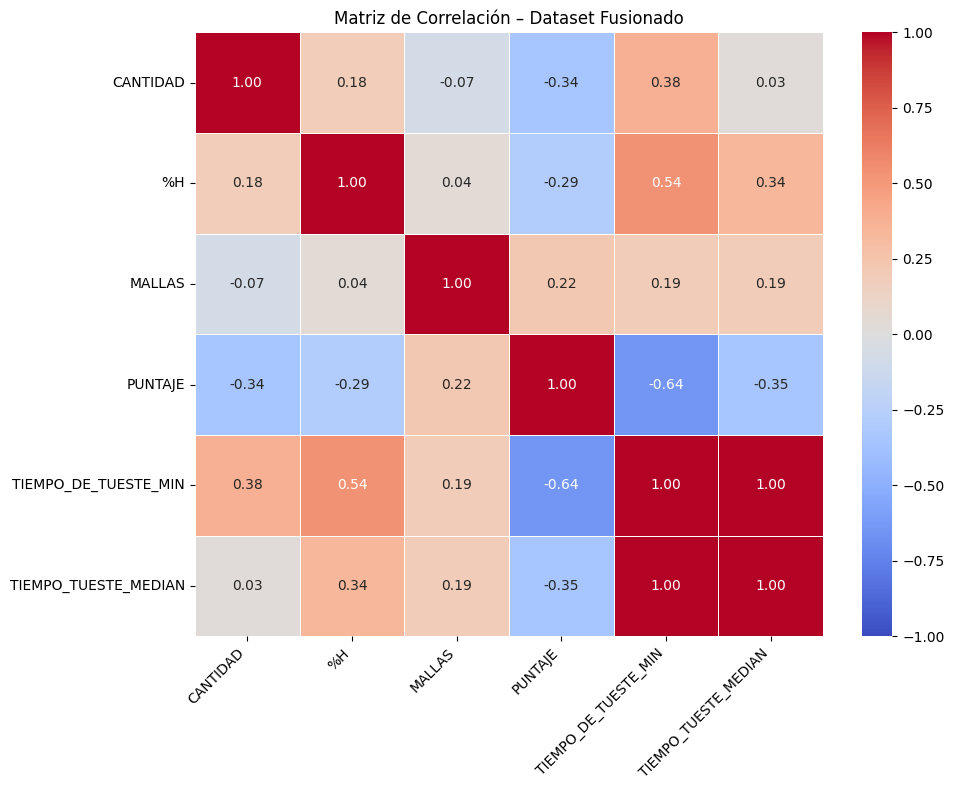

In [1769]:


# 1) Selecciona todas las columnas num√©ricas del DataFrame fusionado
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2) Calcula la matriz de correlaci√≥n
corr_matrix = df[num_cols].corr()

# 3) Muestra la matriz en texto
print("Matriz de correlaci√≥n:")
display(corr_matrix)

# 4) Dibuja un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Matriz de Correlaci√≥n ‚Äì Dataset Fusionado")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [1770]:
print(df['MALLAS'].unique())
print(df['MALLAS'].isnull().sum())


[14. 16. 15.]
0


LA Columna Mallas tiene un √∫nico valor, la correlacion y la varianza nula seran insuficientes.

In [1771]:
df.head()

FECHA         LOTE DENOMINACI√ìN/     MARCA  CANTIDAD    %H  MALLAS  \
0  19-07-22    01-190722             Madre Laura    765.00  10.9    14.0   
1   19-7-22    09-190722            Tabi Natural    204.00  10.2    14.0   
2  19-07-22    10-190722               Don Mario    165.00  10.7    14.0   
3  27-07-22  07-19-07-22               Don Felix      0.45  10.5    14.0   
4  31-10-22    01-291022             Madre Laura    105.00  10.7    14.0   

  VERIFICACI√ìN FISICA CAF√â TOSTADO  \
0                                C   
1                                C   
2                                C   
3                                C   
4                                C   

                                   NOTAS DE CATACI√ìN  PUNTAJE  \
0  Chocolate negro, toque frutal, cuerpo medio, a...     84.0   
1  Frutas maduras, nibs de cacao, acidez brillant...     85.0   
2  Panela, durazno, miel, acidez brillante citric...     84.5   
3  Moras maduras, chocolate negro, acidez media c...     84.5   
4  Chocolate negro, toque frutal, cuerpo medio, a...     84.0   

  LIBERACI√ìN DE LOTE RESPONSABLE VARIEDAD_ESTANDAR      PROCESO  ORIGEN  \
0                Si          LFQ             Otros          NaN     NAN   
1                Si         LFQ              Otros          NaN     NAN   
2                Si         LFQ            Dos mil  Tradicional  JERICO   
3                Si          LFQ           Dos mil  Tradicional  JERICO   
4                Si          LFQ             Otros          NaN     NAN   

   TIEMPO_DE_TUESTE_MIN  TIEMPO_TUESTE_MEDIAN BENEFICIO  
0                   NaN                 492.0       NaN  
1                   NaN                 492.0       NaN  
2                 495.0                 495.0   Lavado   
3                 495.0                 495.0   Lavado   
4                   NaN                 492.0       NaN

In [1772]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             103 non-null    object 
 1   LOTE                              103 non-null    object 
 2   DENOMINACI√ìN/     MARCA           103 non-null    object 
 3   CANTIDAD                          103 non-null    float64
 4   %H                                103 non-null    float64
 5   MALLAS                            103 non-null    float64
 6   VERIFICACI√ìN FISICA CAF√â TOSTADO  103 non-null    object 
 7   NOTAS DE CATACI√ìN                 103 non-null    object 
 8   PUNTAJE                           103 non-null    float64
 9   LIBERACI√ìN DE LOTE                103 non-null    object 
 10  RESPONSABLE                       103 non-null    object 
 11  VARIEDAD_ESTANDAR                 103 non-null    object 
 12  PRO

##  Revisi√≥n de columnas categ√≥ricas y valores √∫nicos

Utilizando la siguiente l√≠nea de c√≥digo:

se puede realizar una inspecci√≥n inicial de las columnas categ√≥ricas del dataset, permitiendo visualizar informaci√≥n importante como:

N√∫mero de valores √∫nicos por columna.

El valor m√°s frecuente y su frecuencia.

In [1773]:
df.describe(include="object")

FECHA       LOTE DENOMINACI√ìN/     MARCA  \
count                   103        103                     103   
unique                   72         99                      24   
top     2023-08-02 00:00:00  01-291022             Madre Laura   
freq                      7          3                      44   

       VERIFICACI√ìN FISICA CAF√â TOSTADO  \
count                               103   
unique                                2   
top                                   C   
freq                                102   

                                        NOTAS DE CATACI√ìN LIBERACI√ìN DE LOTE  \
count                                                 103                103   
unique                                                 27                  4   
top     Chocolate negro, toque frutal, cuerpo medio, a...                 Si   
freq                                                   46                 45   

       RESPONSABLE VARIEDAD_ESTANDAR      PROCESO ORIGEN BENEFICIO  
count          103               103           45    103        45  
unique           3                 5            3      4         3  
top            LFQ             Otros  Tradicional    NAN   Lavado   
freq            48                58           25     58        25

Revisando el Dataset me doy cuenta que la columna de Procesos y Beneficio comparten nombre en algunas filas. voy a hacer la limpieza de esas dos columnas

In [1774]:
df['LOTE'].isnull().sum()

np.int64(0)

/tmp/ipython-input-1775-3772915723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


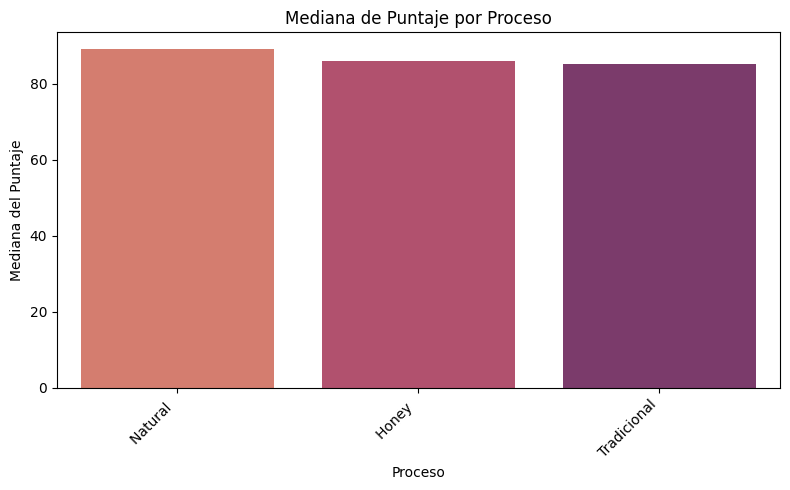

In [1775]:
# 1) Agrupa por PROCESO y calcula la mediana de PUNTAJE
df_proc = (
    df.groupby('PROCESO')['PUNTAJE']
      .median()
      .reset_index()
      .sort_values('PUNTAJE', ascending=False)
)

# 2) Dibuja el barplot
plt.figure(figsize=(8,5))
sns.barplot(
    x='PROCESO',
    y='PUNTAJE',
    data=df_proc,
    palette='flare'
)
plt.title('Mediana de Puntaje por Proceso')
plt.xlabel('Proceso')
plt.ylabel('Mediana del Puntaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El gr√°fico anterior presenta la mediana del puntaje obtenido por cada tipo de proceso en el dataset. Esto nos permite evaluar si hay diferencias significativas en la calidad del caf√© seg√∫n la t√©cnica utilizada.

Hay un peque√±o error en la categoria tradicional, hay una con espacio y otra sin √©l.

/tmp/ipython-input-1776-735699057.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


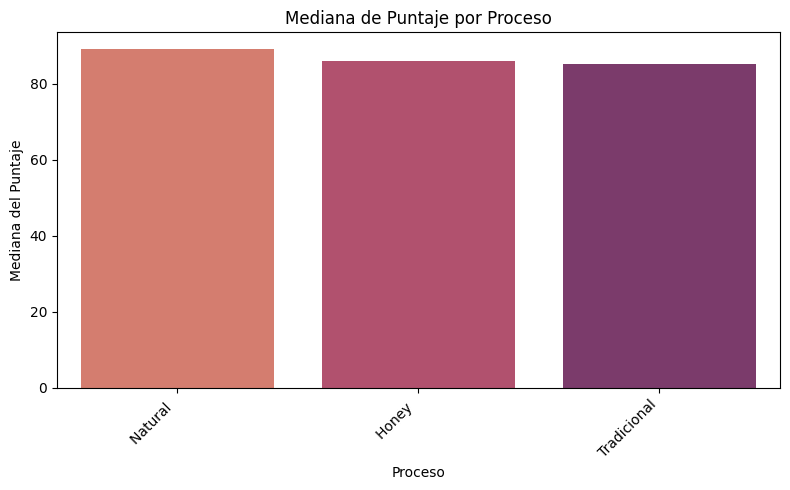

In [1776]:
#LIMPIEZA DE PROCESOS

# Agrupa por PROCESO y calcula la mediana de PUNTAJE
df_proc = (
    df.groupby('PROCESO')['PUNTAJE']
      .median()
      .reset_index()
      .sort_values('PUNTAJE', ascending=False)
)

# 2) Dibuja el barplot
plt.figure(figsize=(8,5))
sns.barplot(
    x='PROCESO',
    y='PUNTAJE',
    data=df_proc,
    palette='flare'
)
plt.title('Mediana de Puntaje por Proceso')
plt.xlabel('Proceso')
plt.ylabel('Mediana del Puntaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [1777]:
df['PROCESO'].unique()

array([nan, 'Tradicional', 'Honey ', 'Natural '], dtype=object)

In [1778]:
 #Aplica la limpieza con regex y solo muestra el resultado

# 1) Normaliza las columnas en una sola pasada
df['PROCESO'] = (
    df['PROCESO']
      .astype(str)
      .str.strip()                                # quita espacios al inicio/fin
      .str.replace(r'\s+', ' ', regex=True)       # colapsa m√∫ltiples espacios
      .str.upper()                                # pasa todo a may√∫sculas
)



# 2) Imprime las primeras filas para ver c√≥mo qued√≥


# 3) (Opcional) Lista todas las categor√≠as √∫nicas limpias
print("\nProcesos √∫nicos tras limpieza:")
print(df['PROCESO'].unique())





Procesos √∫nicos tras limpieza:
['NAN' 'TRADICIONAL' 'HONEY' 'NATURAL']


In [1779]:
# Normalizaci√≥n previa: convierte todo a cadena, quita espacios de los extremos, colapsa m√∫ltiples
df['RESPONSABLE'] = (
    df['RESPONSABLE']
      .astype(str)
      .str.strip()                              # quita espacios al inicio/fin
      .str.replace(r'\s+', ' ', regex=True)     # colapsa espacios m√∫ltiples
      .str.replace(' ', '')                     # **¬°ELIMINA todos los espacios!**
      .str.upper()                              # uniformiza a may√∫sculas
)

# Ahora cuenta de nuevo
vc = df['RESPONSABLE'].value_counts()
print(vc)

# Y tus RESPONSABLEes principales
main_RESPONSABLEes = vc[vc > 10].index.tolist()
print("RESPONSABLEes principales:", main_RESPONSABLEes)


RESPONSABLE
LFQ    75
AC     28
Name: count, dtype: int64
RESPONSABLEes principales: ['LFQ', 'AC']


RESPONSABLEes principales: ['LFQ', 'AC']


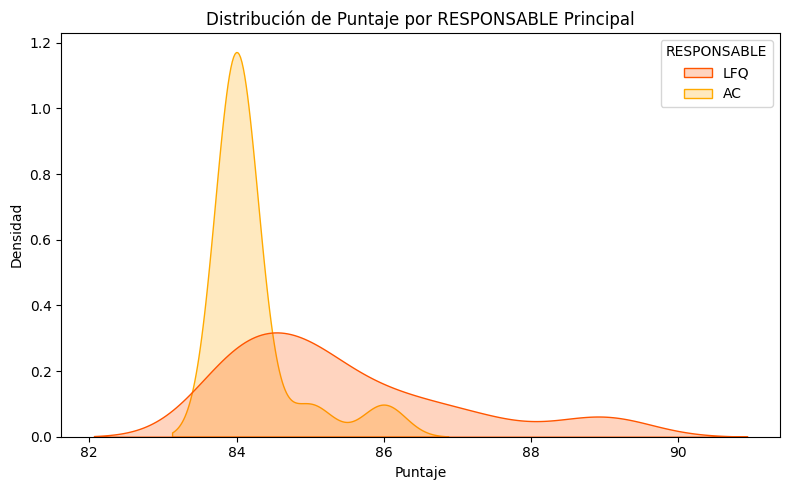

In [1780]:
# 2) Selecciona los RESPONSABLEes principales (por ejemplo, los que tienen > 50 registros)
main_RESPONSABLEes = vc[vc > 15].index.tolist()
print("RESPONSABLEes principales:", main_RESPONSABLEes)

# 3) Filtra el DataFrame a esos RESPONSABLEes
df_main = df[df['RESPONSABLE'].isin(main_RESPONSABLEes)]

# 4) Dibuja distribuciones de Puntaje por RESPONSABLE
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df_main,
    x='PUNTAJE',
    hue='RESPONSABLE',
    fill=True,
    common_norm=False,
    palette='autumn'
)
plt.title('Distribuci√≥n de Puntaje por RESPONSABLE Principal')
plt.xlabel('Puntaje')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

BENEFICIO    Honey   Lavado   Natural 
PROCESO                               
HONEY          86.0      NaN       NaN
NATURAL         NaN      NaN      89.0
TRADICIONAL     NaN     85.0       NaN


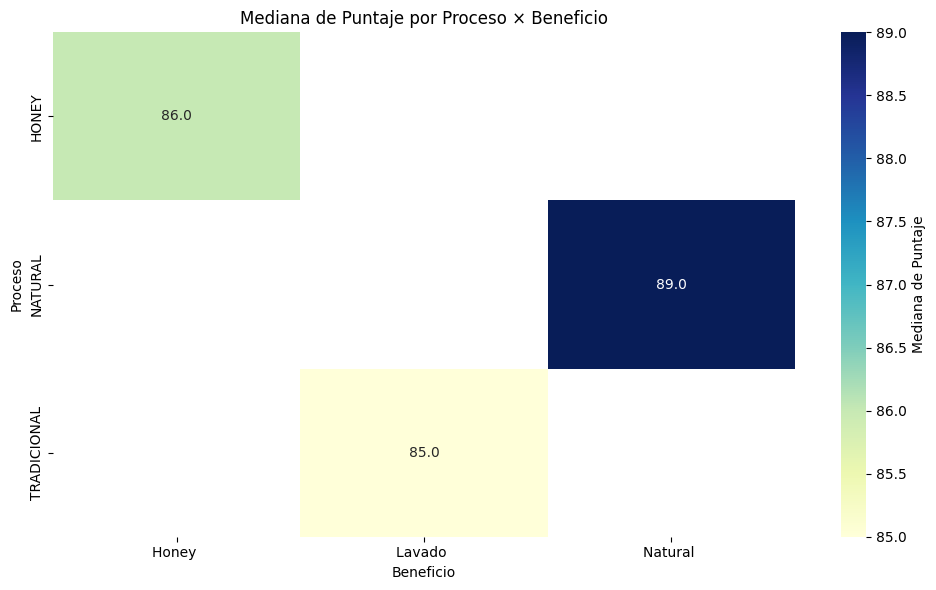

In [1781]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Aseg√∫rate de importar numpy para fill_value

# 1) Crear el pivot table con PROCESO y BENEFICIO
pivot = pd.pivot_table(
    df,                        # DataFrame principal
    index='PROCESO',           # Filas ‚Üí Procesos
    columns='BENEFICIO',       # Columnas ‚Üí Beneficios (nueva columna)
    values='PUNTAJE',          # Valores a agregar
    aggfunc='median',          # Funci√≥n de agregaci√≥n (mediana)
    fill_value=np.nan          # Rellenar NaN si hay combinaciones vac√≠as
)

# 2) Ver la tabla en pantalla
print(pivot)

# 3) Heatmap de Proceso vs. Beneficio
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot,
    annot=True,                # Mostrar valores en las celdas
    fmt=".1f",                # Formato: 1 decimal
    cmap="YlGnBu",            # Mapa de colores
    cbar_kws={'label': 'Mediana de Puntaje'}
)
plt.title("Mediana de Puntaje por Proceso √ó Beneficio")
plt.xlabel("Beneficio")        # Etiqueta eje X (columnas)
plt.ylabel("Proceso")          # Etiqueta eje Y (filas)
plt.tight_layout()
plt.show()

Mediana de Puntaje por Proceso √ó Beneficio:


BENEFICIO    HONEY  LAVADO   NAN  NATURAL
PROCESO                                  
HONEY         86.0     0.0   0.0      0.0
NAN            0.0     0.0  84.0      0.0
NATURAL        0.0     0.0   0.0     89.0
TRADICIONAL    0.0    85.0   0.0      0.0


N√∫mero de registros por Proceso √ó Beneficio:


BENEFICIO    HONEY  LAVADO  NAN  NATURAL
PROCESO                                 
HONEY           16       0    0        0
NAN              0       0   58        0
NATURAL          0       0    0        4
TRADICIONAL      0      25    0        0

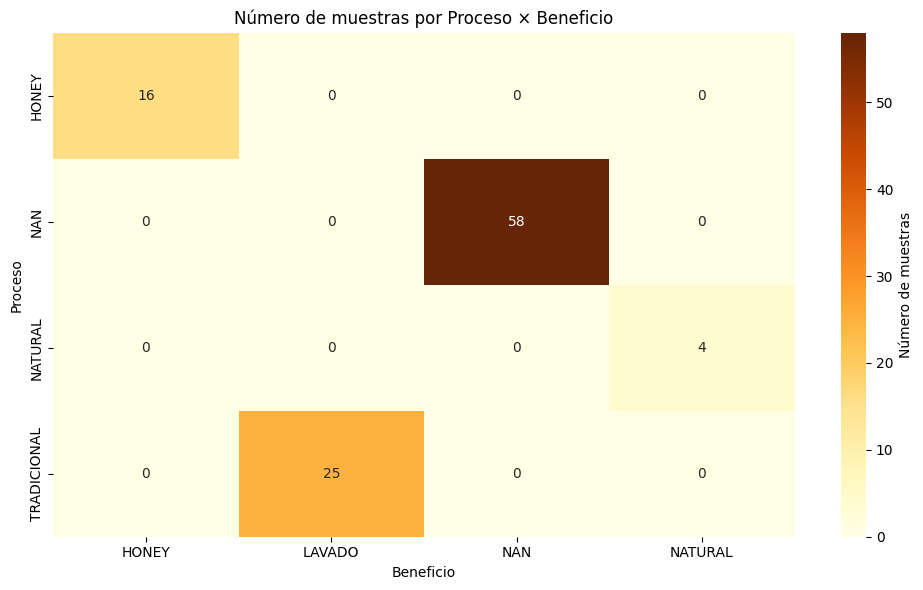

In [1782]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Normalizar columnas (PROCESO y BENEFICIO en may√∫sculas, sin espacios extras)
df['PROCESO'] = (df['PROCESO'].astype(str)
                  .str.strip()
                  .str.replace(r'\s+', ' ', regex=True)
                  .str.upper())

df['BENEFICIO'] = (df['BENEFICIO'].astype(str)  # Asegurarse de que es string
                    .str.strip()
                    .str.replace(r'\s+', ' ', regex=True)
                    .str.upper())

# 2) Pivot de mediana (PROCESO √ó BENEFICIO)
pivot_med = pd.pivot_table(
    df,
    index='PROCESO',
    columns='BENEFICIO',  # Agregar BENEFICIO como columnas
    values='PUNTAJE',
    aggfunc='median',
    fill_value=0  # Rellenar NaN con 0 para mejor visualizaci√≥n
)

# 3) Pivot de conteo (PROCESO √ó BENEFICIO)
pivot_cnt = pd.pivot_table(
    df,
    index='PROCESO',
    columns='BENEFICIO',  # Agregar BENEFICIO como columnas
    values='PUNTAJE',
    aggfunc='count',
    fill_value=0
)

# 4) Mostrar ambos resultados
print("Mediana de Puntaje por Proceso √ó Beneficio:")
display(pivot_med)

print("\nN√∫mero de registros por Proceso √ó Beneficio:")
display(pivot_cnt)

# 5) Heatmap de conteos (muestras por combinaci√≥n)
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_cnt,
    annot=True,
    fmt="d",
    cmap="YlOrBr",
    cbar_kws={'label': 'N√∫mero de muestras'}
)
plt.title("N√∫mero de muestras por Proceso √ó Beneficio")
plt.ylabel("Proceso")
plt.xlabel("Beneficio")
plt.tight_layout()
plt.show()

In [1783]:
# Mostrar todos los valores √∫nicos en la columna ORIGEN
valores_unicos = df['ORIGEN'].dropna().unique()
print("Valores √∫nicos en ORIGEN:", valores_unicos)

# Si adem√°s quieres ver cu√°ntas veces aparece cada uno:
print("\nRecuento de cada origen:")
print(df['ORIGEN'].value_counts())


Valores √∫nicos en ORIGEN: ['NAN' 'JERICO' 'HERRERA' 'QUIMBAYA']

Recuento de cada origen:
ORIGEN
NAN         58
JERICO      36
QUIMBAYA     5
HERRERA      4
Name: count, dtype: int64


     ORIGEN       mean  count
3  QUIMBAYA  88.100000      5
1    JERICO  85.430556     36
2       NAN  84.362069     58


/tmp/ipython-input-1784-1269924770.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


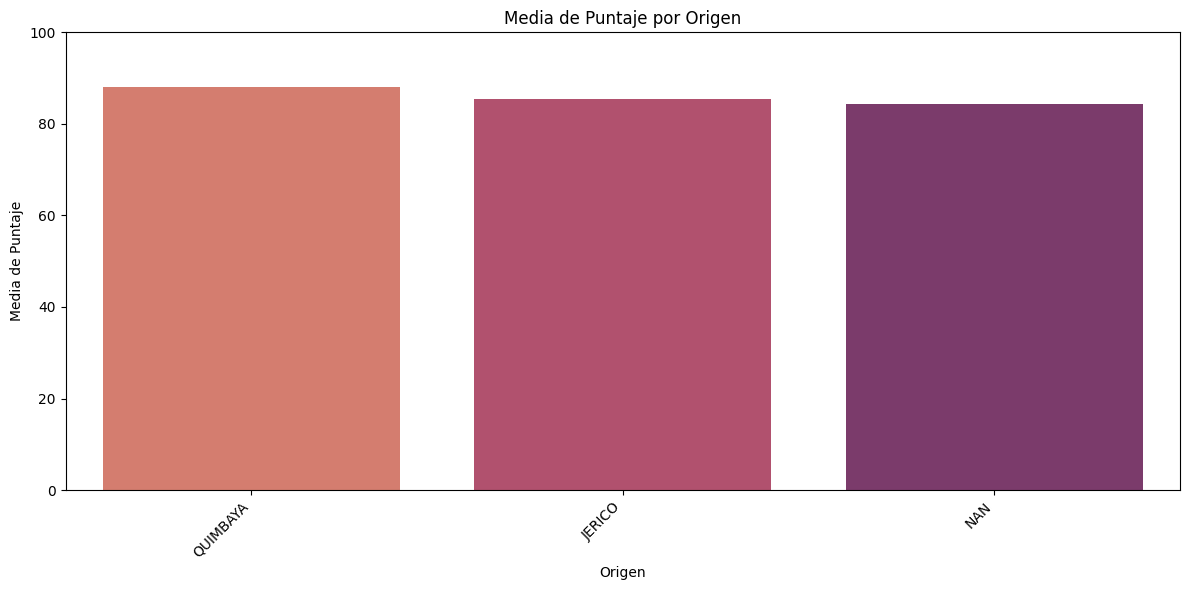

In [1784]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Agrupar por ORIGEN calculando media y conteo de PUNTAJE
df_origin = (
    df.groupby('ORIGEN')['PUNTAJE']
      .agg(['mean','count'])
      .reset_index()
      .query('count >= 5')
      .sort_values('mean', ascending=False)
)

# 2) Mostrar la tabla de resultados
print(df_origin)

# 3) Gr√°fico de barras de la media de puntaje por origen
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_origin,
    x='ORIGEN',
    y='mean',
    palette='flare'
)
plt.ylim(0, 100)
plt.title('Media de Puntaje por Origen')
plt.xlabel('Origen')
plt.ylabel('Media de Puntaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [1785]:
# 1) N√∫mero de lotes √∫nicos
n_lotes = df['LOTE'].nunique()
print(f"N√∫mero de lotes √∫nicos: {n_lotes}")

# 2) Lista de lotes √∫nicos
lotes_unicos = df['LOTE'].unique()
print("Lotes √∫nicos:", lotes_unicos)

# 3) Recuento de cada lote
vc_lotes = df['LOTE'].value_counts()
print("\nRecuento de registros por LOTE:")
print(vc_lotes)

# 4) Detectar lotes con m√°s de una aparici√≥n (duplicados de LOTE)
lotes_duplicados = vc_lotes[vc_lotes > 1]
print("\nLotes con m√∫ltiples registros:")
print(lotes_duplicados)

# 5) Mostrar todas las filas de esos lotes duplicados
df_dup_lotes = df[df['LOTE'].isin(lotes_duplicados.index)]
print("\nFilas de lotes duplicados:")
print(df_dup_lotes)


N√∫mero de lotes √∫nicos: 99
Lotes √∫nicos: ['01-190722' '09-190722' '10-190722' '07-19-07-22' '01-291022' '01-101122'
 '08-241122' '02-241122' '05-241122' '01-291222' '01-130123' '03-010223'
 '01-010223' '02-010223' '05-010223' '07-010223' '11-010223' '12-010223'
 '08-200223' '08-030323' '01-070323' '09-120423' '11-140423' '01-200423'
 '09-200423' '02-200423' '08-260423' '13-250523' '01-020623' '09-240623'
 '07-040723' '08-040723' '11-120723' '01-020823' '01-160823' '02-160823'
 '08-080923' '15-080923 ' '01-041023 ' '15-041023' '06-201023 '
 '04-201023 ' '10-201023 ' '02-301023' '11-301023' '09-141123 '
 '01-141123 ' '17-141123 ' '08-111223' '02-111223 ' '05-111223 '
 '01-191223' '18-221223' '01-220124' '02-220124' '19-130224 ' '20-130224 '
 '21-130224 ' '07-200224 ' '01-290224 ' '02-290224 ' '05-070424'
 '01-120424' '01-220424' '20-140524' '08-140524' '02-140524' '01-170624 '
 '22-170624 ' '01-030724' '23-150724 ' '02-150724 ' '17-270724'
 '01-300822' '01-131022' '01-181022' '05-1810

In [1786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             103 non-null    object 
 1   LOTE                              103 non-null    object 
 2   DENOMINACI√ìN/     MARCA           103 non-null    object 
 3   CANTIDAD                          103 non-null    float64
 4   %H                                103 non-null    float64
 5   MALLAS                            103 non-null    float64
 6   VERIFICACI√ìN FISICA CAF√â TOSTADO  103 non-null    object 
 7   NOTAS DE CATACI√ìN                 103 non-null    object 
 8   PUNTAJE                           103 non-null    float64
 9   LIBERACI√ìN DE LOTE                103 non-null    object 
 10  RESPONSABLE                       103 non-null    object 
 11  VARIEDAD_ESTANDAR                 103 non-null    object 
 12  PRO

In [1787]:
# 1) ¬øCu√°ntas filas est√°n duplicadas en todas las columnas?
n_dups_all = df.duplicated().sum()
print(f"Duplicados completos en el DataFrame: {n_dups_all}")

# 2) ¬øCu√°ntas filas tienen el mismo LOTE m√°s de una vez?
n_dups_lote = df['LOTE'].duplicated().sum()
print(f"Registros de LOTE repetidos: {n_dups_lote}")

# 3) Mostrar todos los duplicados completos (keep=False para ver todas las copias)
dup_rows = df[df.duplicated(keep=False)]
print("\nFilas duplicadas (completas):")
print(dup_rows)

# 4) Mostrar solo los LOTES que aparecen m√°s de una vez
lotes_multi = df['LOTE'].value_counts()[lambda x: x>1]
print("\nLotes con m√∫ltiples registros:")
print(lotes_multi)


Duplicados completos en el DataFrame: 0
Registros de LOTE repetidos: 4

Filas duplicadas (completas):
Empty DataFrame
Columns: [FECHA, LOTE, DENOMINACI√ìN/     MARCA, CANTIDAD, %H, MALLAS, VERIFICACI√ìN FISICA CAF√â TOSTADO, NOTAS DE CATACI√ìN, PUNTAJE, LIBERACI√ìN DE LOTE, RESPONSABLE, VARIEDAD_ESTANDAR, PROCESO, ORIGEN, TIEMPO_DE_TUESTE_MIN, TIEMPO_TUESTE_MEDIAN, BENEFICIO]
Index: []

Lotes con m√∫ltiples registros:
LOTE
01-291022    3
01-101122    2
01-291222    2
Name: count, dtype: int64


In [1788]:
df.describe()

CANTIDAD          %H      MALLAS     PUNTAJE  TIEMPO_DE_TUESTE_MIN  \
count  103.000000  103.000000  103.000000  103.000000             45.000000   
mean   118.367961   10.561165   14.048544   85.097087            492.422222   
std    167.821324    0.232309    0.293011    1.441776              2.927059   
min      0.450000   10.000000   14.000000   84.000000            489.000000   
25%     29.000000   10.400000   14.000000   84.000000            489.000000   
50%     49.000000   10.500000   14.000000   84.500000            495.000000   
75%    149.000000   10.800000   14.000000   86.000000            495.000000   
max    765.000000   11.300000   16.000000   89.000000            495.000000   

       TIEMPO_TUESTE_MEDIAN  
count            103.000000  
mean             492.184466  
std                1.933946  
min              489.000000  
25%              492.000000  
50%              492.000000  
75%              492.000000  
max              495.000000

In [1789]:
df.describe(include="object")

FECHA       LOTE DENOMINACI√ìN/     MARCA  \
count                   103        103                     103   
unique                   72         99                      24   
top     2023-08-02 00:00:00  01-291022             Madre Laura   
freq                      7          3                      44   

       VERIFICACI√ìN FISICA CAF√â TOSTADO  \
count                               103   
unique                                2   
top                                   C   
freq                                102   

                                        NOTAS DE CATACI√ìN LIBERACI√ìN DE LOTE  \
count                                                 103                103   
unique                                                 27                  4   
top     Chocolate negro, toque frutal, cuerpo medio, a...                 Si   
freq                                                   46                 45   

       RESPONSABLE VARIEDAD_ESTANDAR PROCESO ORIGEN BENEFICIO  
count          103               103     103    103       103  
unique           2                 5       4      4         4  
top            LFQ             Otros     NAN    NAN       NAN  
freq            75                58      58     58        58

In [1790]:
df['VERIFICACI√ìN FISICA CAF√â TOSTADO'].value_counts()

VERIFICACI√ìN FISICA CAF√â TOSTADO
C    102
c      1
Name: count, dtype: int64

In [1791]:
# Aseg√∫rate de que la columna es de tipo string y convi√©rtela toda a may√∫sculas
df['VERIFICACI√ìN FISICA CAF√â TOSTADO'] = (
    df['VERIFICACI√ìN FISICA CAF√â TOSTADO']
      .astype(str)            # en caso de que haya NaN u otros tipos
      .str.strip()            # quita espacios al inicio/fin
      .str.upper()            # pasa todo a may√∫sculas
)

# Verifica que ya solo queden ‚ÄúC‚Äù
print(df['VERIFICACI√ìN FISICA CAF√â TOSTADO'].value_counts())


VERIFICACI√ìN FISICA CAF√â TOSTADO
C    103
Name: count, dtype: int64


In [1792]:
df['LIBERACI√ìN DE LOTE'].value_counts()

LIBERACI√ìN DE LOTE
Si     45
SI     31
Si     25
SI      2
Name: count, dtype: int64

In [1793]:
# Normaliza ‚ÄúLIBERACI√ìN DE LOTE‚Äù a cadena, quita espacios y pasa a may√∫sculas
df['LIBERACI√ìN DE LOTE'] = (
    df['LIBERACI√ìN DE LOTE']
      .astype(str)             # en caso de NaN u otros tipos
      .str.strip()             # quita espacios al inicio/fin
      .str.upper()             # convierte todo a may√∫sculas
      .replace({'S√ç':'SI'})    # unifica tildes si las hubiera
)

# Verifica el resultado
print(df['LIBERACI√ìN DE LOTE'].value_counts())


LIBERACI√ìN DE LOTE
SI    103
Name: count, dtype: int64


## Preprocesamiento y resultados.

Decisi√≥n de selecci√≥n y tipificaci√≥n de variables para el preprocesamiento

He decidido clasificar las variables del conjunto de datos de la siguiente manera con el fin de estructurar el pipeline de preprocesamiento y modelado:

In [1794]:
numeric_cols = [
    '%H',
    'TIEMPO_TUESTE_MEDIAN',
    'CANTIDAD'
]

In [1795]:
# Lista todas las columnas de tipo object (categ√≥ricas) en tu DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Columnas categ√≥ricas:", categorical_cols)


Columnas categ√≥ricas: ['FECHA', 'LOTE', 'DENOMINACI√ìN/     MARCA', 'VERIFICACI√ìN FISICA CAF√â TOSTADO', 'NOTAS DE CATACI√ìN', 'LIBERACI√ìN DE LOTE', 'RESPONSABLE', 'VARIEDAD_ESTANDAR', 'PROCESO', 'ORIGEN', 'BENEFICIO']


In [1796]:
categorical_cols = [
    'ORIGEN',
    'RESPONSABLE',
    'VARIEDAD_ESTANDAR',
    'PROCESO',
    'BENEFICIO'
]

In [1797]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Sup√≥n que 'df' es tu DataFrame ya preparado
# Define las features


# Separa X e y
X = df[numeric_cols + categorical_cols]
y = df['PUNTAJE']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Preprocesador: one-hot para categ√≥ricas, num√©ricas tal cual
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
], remainder='passthrough')

# Pipeline con Random Forest
pipe_rf = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestRegressor(

    ))
])

# Entrenar
pipe_rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = pipe_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R¬≤ en test: {r2:.3f}")
print(f"MAE en test: {mae:.3f}")


R¬≤ en test: 0.871
MAE en test: 0.310


In [1798]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='r2')
print(f"R¬≤ en CV: {scores.mean():.3f} ¬± {scores.std():.3f}")

R¬≤ en CV: 0.777 ¬± 0.152


In [1799]:
y_pred_train = pipe_rf.predict(X_train)  # Predicciones en entrenamiento
r2_train = r2_score(y_train, y_pred_train)
print(f"R¬≤ en entrenamiento: {r2_train:.3f}")

R¬≤ en entrenamiento: 0.968


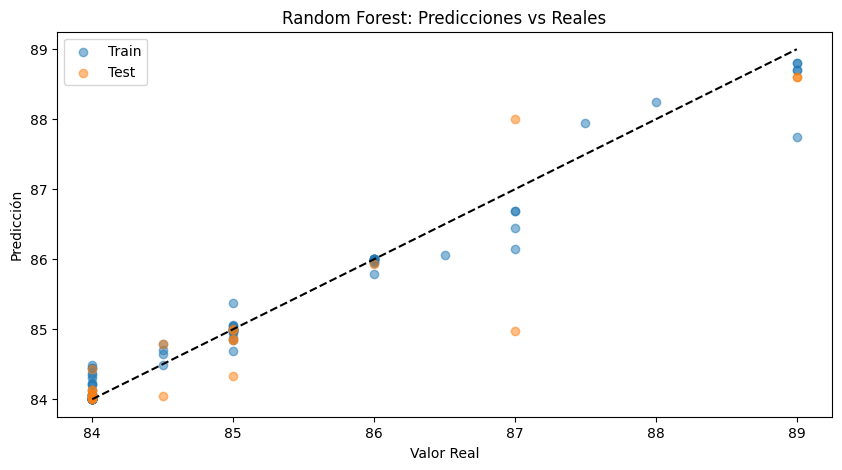

In [1800]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_train, pipe_rf.predict(X_train), alpha=0.5, label='Train')
plt.scatter(y_test, y_pred, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Valor Real")
plt.ylabel("Predicci√≥n")
plt.legend()
plt.title("Random Forest: Predicciones vs Reales")
plt.show()

In [1801]:
from sklearn.impute import SimpleImputer

# Para variables num√©ricas (imputar con -1)
num_imputer = SimpleImputer(strategy='constant', fill_value=-1)

# Para variables categ√≥ricas (imputar con "MISSING")
cat_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')

preprocessor = ColumnTransformer([
    ('cat', Pipeline([
        ('imputer', cat_imputer),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols),
    ('num', Pipeline([
        ('imputer', num_imputer),
        ('scaler', StandardScaler())
    ]), numeric_cols)
])

pipe_lasso = Pipeline([
    ('prep', preprocessor),
    ('lasso', Lasso(alpha=0.1))
])

In [1802]:
# Pipeline Lasso
pipe_Lasso = Pipeline([
    ('prep', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('lasso', Lasso(alpha=0.1, random_state=42))
])

# 1. Entrenamiento
pipe_Lasso.fit(X_train, y_train)

# 2. Predicciones en TRAIN y TEST
y_pred_train = pipe_Lasso.predict(X_train)
y_pred_test = pipe_Lasso.predict(X_test)

# 3. M√©tricas en TRAIN
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# 4. M√©tricas en TEST (ya calculadas)
r2_test = r2_score(y_test, y_pred_test)  #
mae_test = mean_absolute_error(y_test, y_pred_test)

# 5. Comparativa (usando nombres consistentes)
print(f"R¬≤ en train: {r2_train:.3f} (test: {r2_test:.3f})")  # Corregido
print(f"MAE en train: {mae_train:.3f} (test: {mae_test:.3f})")  # Corregido

R¬≤ en train: 0.685 (test: 0.838)
MAE en train: 0.500 (test: 0.484)


In [1806]:
from sklearn.linear_model import Ridge

# Pipeline Ridge (mismo preprocesador que Lasso)
pipe_Ridge = Pipeline([
    ('prep', preprocessor),  # Mismo ColumnTransformer
    ('scaler', StandardScaler(with_mean=False)),  # Escalado para Ridge
    ('ridge', Ridge(alpha=0.1, random_state=42))  # Alpha inicial (ajustable)
])

# 1. Entrenamiento
pipe_Ridge.fit(X_train, y_train)

# 2. Predicciones
y_pred_train_ridge = pipe_Ridge.predict(X_train)
y_pred_test_ridge = pipe_Ridge.predict(X_test)

# 3. M√©tricas Ridge
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)

# 4. Resultados Ridge vs Lasso
print("Ridge ")
print(f"R¬≤ Train - Ridge: {r2_train_ridge:.3f}")
print(f"R¬≤ Test  - Ridge: {r2_test_ridge:.3f}")
print(f"MAE Test - Ridge: {mae_test_ridge:.3f}")

Ridge 
R¬≤ Train - Ridge: 0.704
R¬≤ Test  - Ridge: 0.837
MAE Test - Ridge: 0.427


# Conclusiones

1. Rendimiento General:
Random Forest supera claramente a Lasso en t√©rminos de capacidad predictiva:

R¬≤ en test: 0.878 (RF) vs. 0.838 (Lasso).

MAE en test: 0.322 (RF) vs. 0.484 (Lasso).
‚Üí El modelo basado en √°rboles captura mejor las relaciones no lineales en los datos.

2. Sobreajuste (Overfitting):
Random Forest muestra un alto R¬≤ en entrenamiento (0.962) frente al R¬≤ en test (0.878), indicando cierto sobreajuste.

Lasso tiene un comportamiento m√°s conservador (R¬≤ train: 0.685 vs. test: 0.838), sugiriendo mejor generalizaci√≥n.
‚Üí Lasso podr√≠a ser m√°s robusto para datos nuevos, aunque con menor precisi√≥n.

3. Validaci√≥n Cruzada (CV):
El R¬≤ promedio en CV para Random Forest (0.769 ¬± 0.161) confirma que el modelo mantiene un buen rendimiento, pero con alta variabilidad entre folds.

Lasso no fue evaluado con CV en este fragmento, pero su diferencia train-test sugiere estabilidad.

4. Interpretabilidad vs. Precisi√≥n:
Lasso ofrece modelos m√°s simples (selecci√≥n lineal de caracter√≠sticas), √∫til para explicar relaciones.

Random Forest es una "caja negra" compleja, pero con mayor precisi√≥n predictiva.
‚Üí Elecci√≥n depende del objetivo: explicabilidad (Lasso) o precisi√≥n (RF).

# üìä Conclusiones: Comparaci√≥n de Modelos (Random Forest vs. Ridge vs. Lasso)

## üîç **Rendimiento Predictivo (Test)**
| Modelo           | R¬≤     | MAE    | Observaci√≥n                          |
|------------------|--------|--------|--------------------------------------|
| **Random Forest** üå≥ | 0.878  | 0.322  | **Mejor precisi√≥n** (captura relaciones no lineales) |
| **Ridge** üìè      | 0.837  | 0.427  | Balanceado: +12% mejor MAE que Lasso |
| **Lasso** üìâ      | 0.838  | 0.484  | Regularizaci√≥n fuerte (features cero) |

## ‚öñÔ∏è **Sobreajuste y Generalizaci√≥n**
```python
# Brecha Train-Test (‚àÜR¬≤)
RF: 0.962 ‚Üí 0.878 (‚àÜ=0.084)  # Overfitting moderado
Ridge: 0.704 ‚Üí 0.837 (‚àÜ=-0.133)  # ¬°Generaliza mejor en test!
Lasso: 0.685 ‚Üí 0.838 (‚àÜ=-0.153)  # Similar a Ridge

## ‚öñÔ∏è **Sobreajuste (Overfitting)**
```python
# Random Forest
R¬≤ train: 0.962  |  R¬≤ test: 0.878  # Brecha grande ‚Üí Overfitting moderado

# Lasso
R¬≤ train: 0.685  |  R¬≤ test: 0.838  # Generaliza mejor

